In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mc_pion = pd.read_csv("Pion_300MeV_500000_1photon_0plus.txt")
mc_compton = pd.read_csv("Compton_300MeV_20000_1photon_0plus.txt")


In [6]:
mc_compton.head()
mc_compton['id'] = mc_compton['id'].replace([2], 1)

In [5]:
mc_compton

,E_beam,E_gamma,theta_gamma,phi_gamma,ncryst,MM,id
0,300.745,229.152,73.378,164.764,10,957.242,1
1,300.745,188.669,133.052,65.717,7,948.543,1
2,300.745,269.853,36.873,74.898,10,951.773,1
3,300.745,288.181,29.989,-66.362,6,938.478,1
4,300.745,235.543,74.968,24.534,8,947.519,1
...,...,...,...,...,...,...,...
16515,300.745,258.153,68.634,-46.459,9,928.219,1
16516,300.745,228.147,101.664,-68.264,8,922.839,1
16517,300.745,280.105,38.087,-15.582,12,939.802,1
16518,300.745,274.839,40.509,-57.557,11,943.059,1


In [7]:
mc_pion

,E_beam,E_gamma,theta_gamma,phi_gamma,ncryst,MM,id
0,300.745,209.042,40.354,24.188,8,1011.206,2
1,300.745,231.604,38.959,95.216,9,989.511,2
2,300.745,82.609,75.814,-128.971,7,1119.019,2
3,300.745,188.412,99.159,138.558,6,979.695,2
4,300.745,109.208,67.185,-130.005,7,1095.254,2
...,...,...,...,...,...,...,...
72359,300.745,52.080,72.003,105.809,4,1151.242,2
72360,300.745,117.730,140.538,-44.118,6,1048.009,2
72361,300.745,78.029,105.280,169.260,7,1113.107,2
72362,300.745,142.714,60.953,171.022,8,1064.312,2


In [8]:
mc_sum = mc_compton.append(mc_pion, ignore_index=True)

mc_sum.head()
mc_sum.drop(["E_beam"], axis = 1, inplace = True)
#mc_sum.drop(["phi_gamma"], axis = 1, inplace = True)
#mc_sum.drop(["phi_p"], axis = 1, inplace = True)

C:\Users\Khach\AppData\Local\Temp\ipykernel_1032\2616440465.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mc_sum = mc_compton.append(mc_pion, ignore_index=True)


In [9]:
mc_sum_reshuffle2 = mc_sum.sample(frac = 1).reset_index()
mc_sum_reshuffle2.drop("index", axis =1, inplace = True)

In [10]:
mc_sum_reshuffle2.head()

,E_gamma,theta_gamma,phi_gamma,ncryst,MM,id
0,141.130,65.336,149.599,6,1063.218,2
1,179.039,88.547,162.224,9,1001.898,2
2,61.435,107.025,124.909,5,1132.112,2
3,250.994,61.160,96.517,10,946.352,1
4,26.008,59.119,125.720,4,1178.268,2


In [11]:
mc_sum_reshuffle2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88884 entries, 0 to 88883
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   E_gamma      88884 non-null  float64
 1   theta_gamma  88884 non-null  float64
 2   phi_gamma    88884 non-null  float64
 3   ncryst       88884 non-null  int64  
 4   MM           88884 non-null  float64
 5   id           88884 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 4.1 MB


In [12]:
#mc_sum_reshuffle2_theta = mc_sum_reshuffle2
#mc_sum_reshuffle2_theta = mc_sum_reshuffle2[mc_sum_reshuffle2_theta["theta_gamma"] > 30.]
mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["theta_gamma"] > 40.]
mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["theta_gamma"] < 140.]
mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["MM"] < 1000.]
mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["MM"] > 920.]


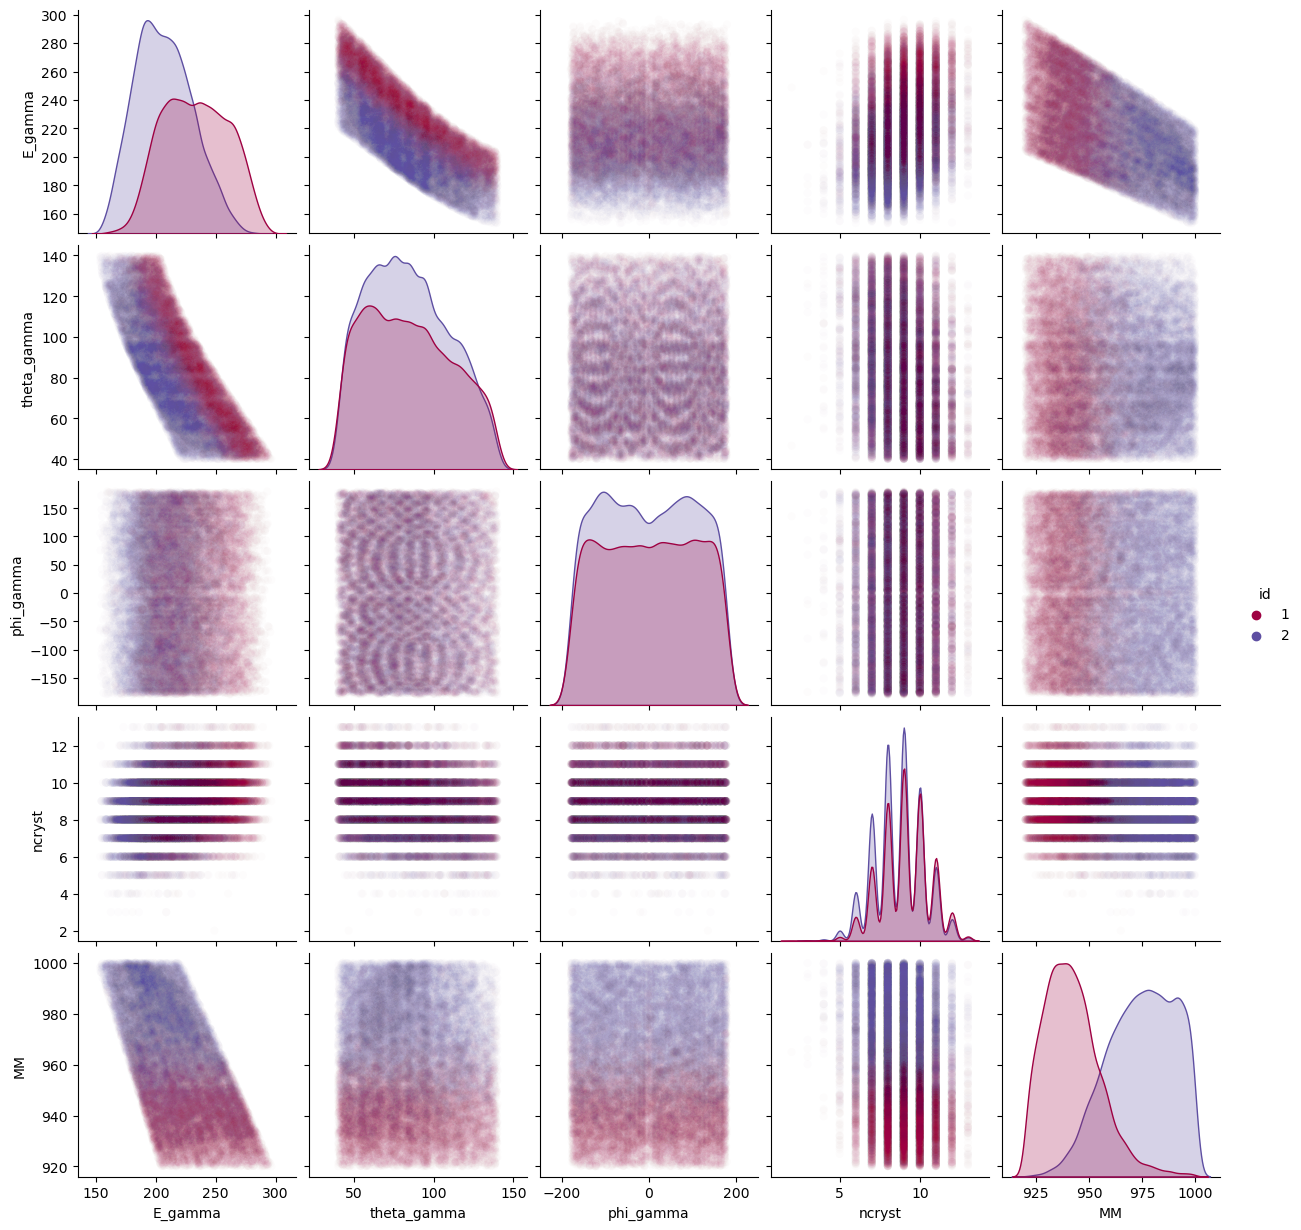

In [13]:
sns.pairplot(mc_sum_reshuffle2, hue = "id",  kind='scatter', plot_kws={'alpha':0.01}, palette='Spectral')

In [18]:
#mc_compton.drop(["E_beam"], axis = 1, inplace = True)
#mc_compton.drop(["phi_gamma"], axis = 1, inplace = True)
#mc_compton.drop(["phi_p"], axis = 1, inplace = True)

In [11]:
#mc_compton.drop(["id"], axis = 1, inplace = True)

<AxesSubplot:>

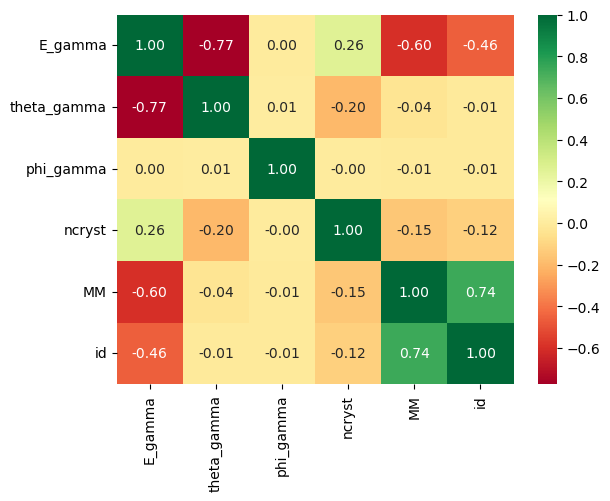

In [14]:
sns.heatmap(mc_sum_reshuffle2.corr(), annot = True, fmt='.2f', cmap='RdYlGn')

In [15]:
mc_sum_reshuffle3 = mc_sum_reshuffle2[np.isfinite(mc_sum_reshuffle2).all(1)]


In [16]:
mc_sum_reshuffle3

,E_gamma,theta_gamma,phi_gamma,ncryst,MM,id
3,250.994,61.160,96.517,10,946.352,1
25,218.588,105.515,172.534,8,931.608,1
27,230.077,67.168,29.084,7,963.479,2
33,278.484,41.091,-50.103,8,938.553,1
34,219.646,50.434,-13.025,9,992.267,2
...,...,...,...,...,...,...
88860,218.548,91.761,-63.030,8,948.221,2
88861,190.387,108.249,-89.859,9,968.033,2
88869,231.292,62.470,-78.452,7,967.411,2
88870,166.837,135.807,-112.073,9,979.465,2


In [17]:
from sklearn.model_selection import train_test_split
#X = mc_sum_reshuffle3[['E_gamma', 'theta_gamma', 'E_p', 'theta_p']]
#y = mc_sum_reshuffle3['MM']
#y = mc_pion['id']
X = mc_sum_reshuffle3[['E_gamma', 'theta_gamma', 'MM', 'ncryst', 'phi_gamma']]
y = mc_sum_reshuffle3['id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [18]:
X_test

,E_gamma,theta_gamma,MM,ncryst,phi_gamma
37541,178.034,98.208,994.118,8,-17.114
15979,208.199,65.544,990.279,10,-22.370
46066,277.644,47.960,931.960,7,49.725
60587,216.966,80.960,963.114,9,104.005
78135,228.712,60.189,972.814,9,122.907
...,...,...,...,...,...
44633,252.194,62.616,943.163,10,30.634
72961,272.873,43.701,941.914,9,91.698
27211,188.684,138.349,944.651,8,170.578
7835,280.678,46.436,930.349,9,43.486


In [19]:
from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier(criterion = 'gini', max_depth = 10, 
#                             max_features = 3, min_samples_leaf = 1, 
#                             min_samples_split = 6, n_estimators = 410)
####200 iter * 3 cv
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 10, 
                             max_features = 5, min_samples_leaf = 2, 
                             min_samples_split = 4, n_estimators = 400)
#rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train,y_train)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

#rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
#              'n_estimators':np.arange(400, 500, step=50),
#              'max_features':randint(1,7),
#              'criterion':['gini'],
#              'min_samples_leaf':randint(1,4),
#              'min_samples_split':np.arange(2, 10, step=2)
#                      }

#rf_random = RandomizedSearchCV(rfc, rs_space, n_iter=200, scoring= 'precision', n_jobs=-1, cv=3, verbose = 10)
#model_random = rf_random.fit(X_train, y_train)

#grid_space={'max_depth':[3,5,10,None],
#              'n_estimators':[10,100,200],
#              'max_features':[1,3,5,7],
#              'min_samples_leaf':[1,2,3],
#              'min_samples_split':[1,2,3]
#           }
#grid = GridSearchCV(rfc, param_grid=grid_space, cv=3, scoring='accuracy')
#############
#grid_space={'max_depth':[10],
#              'n_estimators':[10,100,200],
#              'max_features':[5, 6, 7],
#              'min_samples_leaf':[1,2,3],
#              'min_samples_split':[4,5,6]
#           }

#grid = GridSearchCV(rfc, param_grid=grid_space, cv=1,scoring='accuracy', verbose = 10)
#model_grid = grid.fit(X_train, y_train)

In [20]:
print('Best hyperparameters are: '+str(model_random.best_params_))
print('Best score is: '+str(model_random.best_score_))

NameError: name 'model_random' is not defined

In [64]:
model_random.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 400}

In [ ]:
model_random.cv_results_
GridResults2 = pd.DataFrame(model_random.cv_results_)
#GridResults.dropna(inplace = True)
#GridResults.head()
#GridResults2.info()
#sns.histplot(data = GridResults2, x = 'param_n_estimators', y = 'mean_test_score')
#GridResults2.drop(["std_fit_time"], axis = 1, inplace = True)
#GridResults2.head(2)
#sns.histplot(data = GridResults2, x = 'param_max_features', hue= 'param_max_depth', y = 'mean_test_score')
#sns.histplot(data = GridResults2, x = 'param_max_depth', hue= 'param_max_features', y = 'mean_test_score')
#sns.histplot(data = GridResults2, x = 'param_max_depth', hue= 'param_n_estimators', y = 'mean_test_score')
#GridResults2.to_csv('RFSearch_First.csv', index=False) 





In [27]:
RF_check_read = pd.read_csv("RFSearch_First.csv")
#RF_check_read.head()
RF_check_read.describe()

,mean_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
count,200.000000,200.000000,200.000000,177.000000,200.000000,200.000000,200.00000,200.000000,156.000000,156.000000,156.000000,156.000000,156.000000,200.000000
mean,102.956859,2.523294,0.188447,49.774011,3.760000,1.975000,5.19000,427.250000,0.858743,0.843886,0.858146,0.853591,0.006934,100.500000
std,78.148952,1.568025,0.470118,26.606450,1.802399,0.817137,2.28693,24.961025,0.003716,0.001998,0.004411,0.002826,0.001874,57.879185
min,0.513665,0.000000,0.000000,10.000000,1.000000,1.000000,2.00000,400.000000,0.851556,0.838900,0.848653,0.847667,0.003265,1.000000
25%,46.648155,2.237758,0.022651,30.000000,2.000000,1.000000,4.00000,400.000000,0.856173,0.842824,0.855171,0.851890,0.005305,50.750000
50%,90.644578,3.034834,0.117356,50.000000,4.000000,2.000000,6.00000,450.000000,0.858574,0.844222,0.857518,0.853412,0.007177,100.500000
75%,176.103991,3.314835,0.224936,70.000000,5.000000,3.000000,8.00000,450.000000,0.860847,0.845236,0.860101,0.854944,0.008063,150.250000
max,260.005459,11.624103,5.614927,90.000000,6.000000,3.000000,8.00000,450.000000,0.867971,0.849336,0.872254,0.861323,0.011368,200.000000


<AxesSubplot:xlabel='param_max_depth', ylabel='mean_test_score'>

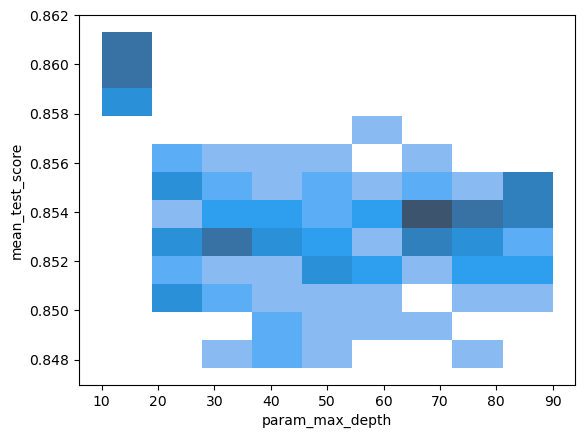

In [28]:
sns.histplot(data = RF_check_read, x = 'param_max_depth', y = 'mean_test_score')

In [23]:
predictions = rfc.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           1       0.85      0.85      0.85      3858
           2       0.88      0.88      0.88      4834

    accuracy                           0.87      8692
   macro avg       0.87      0.87      0.87      8692
weighted avg       0.87      0.87      0.87      8692

[[3271  587]
 [ 567 4267]]


In [32]:
#y_hats = model.predict(X_test)
#y_test['preds'] = predictions
#frame = {'preds': predictions}
#result = pd.DataFrame(y_test)
#result.rename(columns = {'id':'id_pred'}, inplace = True)

address = [predictions] 
# Using 'Address' as the column name
# and equating it to the list
X_test["id_predicted"] = predictions

y_test_array = y_test.to_numpy() 

#difference = [predictions - y_test] 
X_test["id_initial"] = y_test_array
#X_test.drop(["difference"], axis = 1, inplace = True)

difference = (predictions - y_test_array) 
X_test["difference"] = difference

X_test.head(20)

,E_gamma,theta_gamma,MM,ncryst,phi_gamma,id_predicted,id_initial,difference
37541,178.034,98.208,994.118,8,-17.114,2,2,0
15979,208.199,65.544,990.279,10,-22.370,2,2,0
46066,277.644,47.960,931.960,7,49.725,1,1,0
60587,216.966,80.960,963.114,9,104.005,2,2,0
78135,228.712,60.189,972.814,9,122.907,2,2,0
66768,277.988,40.324,939.865,8,-21.604,1,1,0
76364,225.968,60.486,975.568,10,122.934,2,2,0
11471,210.693,103.847,944.615,11,-99.465,1,1,0
3986,238.841,90.707,922.553,12,-45.514,1,1,0
41255,216.203,96.390,945.781,11,-76.510,1,1,0


<AxesSubplot:xlabel='MM', ylabel='theta_gamma'>

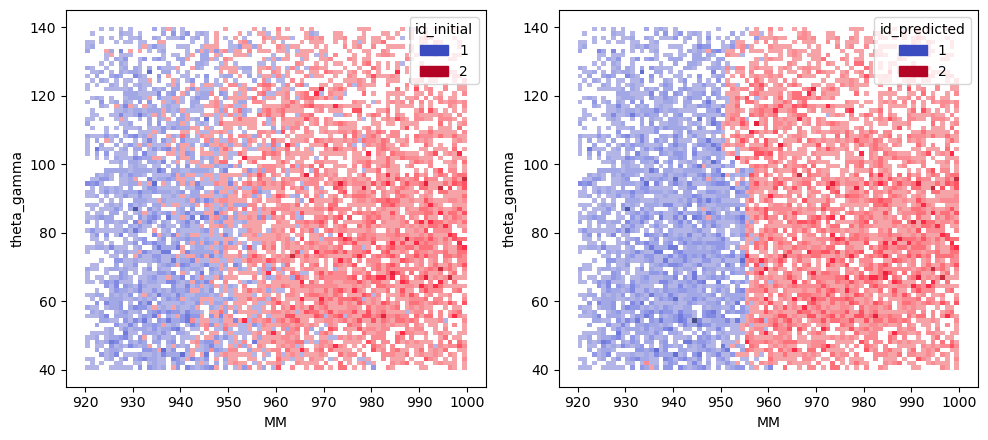

In [33]:
#sns.pairplot(X_test, hue = "difference",  kind='scatter', plot_kws={'alpha':0.03}, palette='coolwarm')
#sns.histplot(data = X_test, x = 'MM', y = 'theta_gamma', hue= 'id_initial', palette='coolwarm', bins = 80)
#sns.histplot(data = X_test, x = 'MM', hue= 'id_predicted', palette='coolwarm', bins = 100)
#ratio = X_test['id_predicted']/X_test['id_initial']
#sns.histplot(data = X_test, x = 'id_predicted', y = 'id_initial', palette='coolwarm')
#sns.histplot(data = X_test, x = 'MM', palette='coolwarm', hue = 'difference', bins = 100)

plt.rcParams["figure.figsize"] = [10.0, 4.5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.histplot(data = X_test, x = 'MM', y = 'theta_gamma', hue= 'id_initial', palette='coolwarm', bins = 80, ax=axes[0])
sns.histplot(data = X_test, x = 'MM', y = 'theta_gamma', hue= 'id_predicted', palette='coolwarm', bins = 80, ax=axes[1])
